In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.transforms import ScaledTranslation
import time as time
import pandas as pd
import math

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

from models import model as MODEL
from dataset import GaussianBumpDataset

In [9]:
sigma = 1.5 # spread of the spot
grid_size = 32 # size of the image grid
model_mode = ['full', 'regularised'][1]
hidden_layers = 2 # number of hidden layers

In [10]:
model = MODEL(grid_size = grid_size, hidden_layers = hidden_layers)
saved = torch.load(f'results/model_{model_mode}.pth', map_location=torch.device('cpu'), weights_only=True)
model.load_state_dict(saved)

<All keys matched successfully>

In [11]:
eigX = saved['eigValX'].numpy()

In [12]:
set_FU = GaussianBumpDataset(sigma = sigma, grid_size = grid_size)
inputs_FU, targets_FU = set_FU.get_all_data()

In [13]:
embX, embY = model.get_embeddings(inputs_FU.to(torch.device('cpu')))

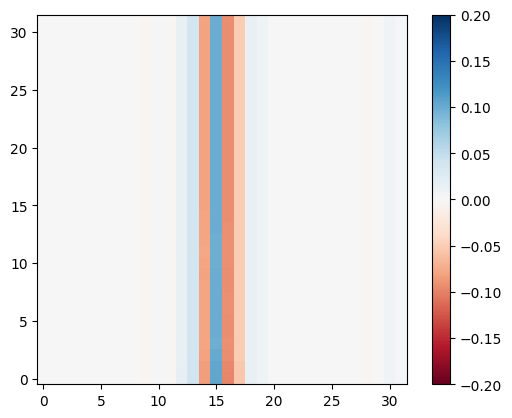

In [14]:
plt.figure()
plt.imshow(embX[15].detach().numpy(), cmap = 'RdBu', vmin = -0.2, vmax = 0.2, origin = 'lower')
plt.colorbar()

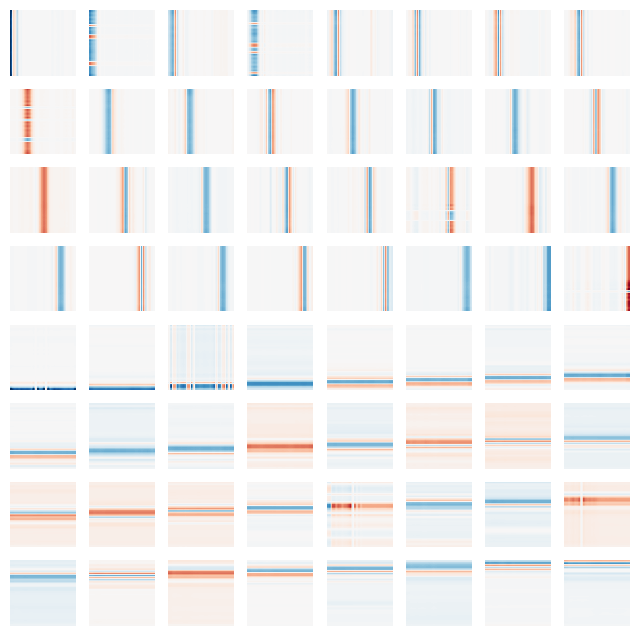

In [15]:
fig, axes = plt.subplots(8, 8, figsize = (8, 8))
axes = np.reshape(axes, -1)
for i in range(0, 32):
    axes[i].imshow(embX[i].detach().numpy(), cmap = 'RdBu', vmin = -0.2, vmax = 0.2, origin = 'lower')
    axes[i].axis('off')
    
for i in range(32, 64):
    axes[i].imshow(embY[(i - 32) * 32].detach().numpy(), cmap = 'RdBu', vmin = -0.2, vmax = 0.2, origin = 'lower')
    axes[i].axis('off')
plt.savefig(f'results/embeddings_{model_mode}.png')